In [8]:
# Problem 1
# H0: Y = X ~ N(0,sigma^2)
# H1: Y = A + X ~ N(A,sigma^2)
# p(H0) = 0.8

# Part a
# p(H0|Y) = p(Y|H0)p(H0)/p(Y) = N(0,sigma^2)*p0/p(Y)
# p(H1|Y) = p(Y|H1)p(H1)/p(Y) = N(A,sigma^2)*p1/p(Y)

#Assume A = 1, sigma = 1
# Forget Costs ---> threshold 

import numpy as np
from scipy.stats import norm as norm
import matplotlib
import matplotlib.pyplot as plt
font = {'family' : 'FreeSerif',
        'size'   : 18}
plt.rc('text', usetex=True)
matplotlib.rc('font', **font)
plt.rcParams['legend.handlelength'] = 1
plt.rcParams['legend.handleheight'] = 1.125
plt.rcParams['legend.numpoints'] = 1

y = 0;
n_H0 = 0;
n_detected_H0 = 0;
a=1
q = 0.8
p = 1 - q


for n in range(1000):
    x = np.random.normal(0, 1, 1)
    if np.random.rand() <= q:
        #H0
        y = x
        n_H0+=1
    else:
        #H1
        y = x + a
    
    if y <=  1/2 + np.log(4):
        n_detected_H0+=1

# # Perr = P(H1 | H0) + P (H0 | H1)
Perr = q * (1 - norm.cdf(0.5 + np.log(4), loc=0, scale=1)) + 0.2 * norm.cdf(0.5 + np.log(4), loc=1, scale=1)
print("Theoretical Probability of Error", Perr)
print("Probability of Error: ", n_H0/n_detected_H0)

Theoretical Probability of Error 0.18615622680831537
Probability of Error:  0.8618490967056323


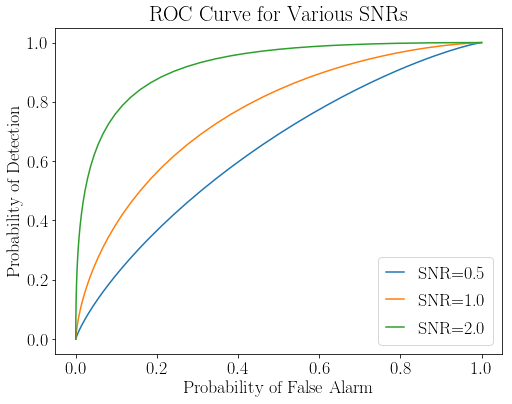

In [2]:
# Part B
# Continue assuming sigma = 1

cdfs = np.zeros((4, 1000))


for n in range(1000): 
    p = n/10 - 10
    cdfs[0, n] = norm.cdf(p, loc=0, scale=1)
    cdfs[1, n] = norm.cdf(p, loc=0.5, scale=1)
    cdfs[2, n] = norm.cdf(p, loc=1, scale=1)
    cdfs[3, n] = norm.cdf(p, loc=2, scale=1)

plt.figure(figsize=(8,6))
for ii, snr in zip(range(1, 4), [0.5, 1, 2]):
    plt.plot(cdfs[ii, :], cdfs[0, :], label='SNR=%0.1f' % snr)
plt.legend(loc='lower right')
plt.title("ROC Curve for Various SNRs")
plt.ylabel("Probability of Detection")
plt.xlabel("Probability of False Alarm")
plt.show()

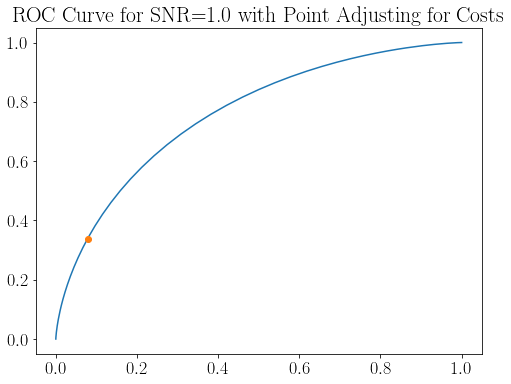

In [4]:
# Part C
# MAP with Costs threshold = 0.5 - log(2.5)  = P(H0)/P(H1) (1/10) ==
plt.figure(figsize=(8,6))
plt.plot(cdfs[2, :], cdfs[0, :], label='SNR=1.0')
plt.plot(norm.cdf(0.5 - np.log(2.5), loc=1, scale=1), norm.cdf(0.5 - np.log(2.5), 0, 1), 'o')
plt.title("ROC Curve for SNR=1.0 with Point Adjusting for Costs")
plt.show()